#**Dealing with Categorical**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Ames_NO_Missing_Data.csv')
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2921,20,RL,75.144444,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2922,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2923,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [4]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


#**Data Description**

In [117]:
df.shape

(2925, 76)

In [196]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
for col in df_copy.columns:
  if df[col].dtype == 'object':
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])

In [201]:
corr = df_copy.corr()['SalePrice'].sort_values(ascending = False)
corr = corr.reset_index()
corr.columns = ['Feature','Correlation']
corr[corr['Correlation']>0.5]

,Feature,Correlation
0,SalePrice,1.000000
1,Overall Qual,0.802637
2,Gr Liv Area,0.727279
3,Total Bsmt SF,0.660983
4,Garage Cars,0.648488
5,1st Flr SF,0.645635
6,Garage Area,0.644368
7,Year Built,0.559165
8,Full Bath,0.546645
9,Year Remod/Add,0.533733


In [214]:
# Percent count of nan values
def percent_missing(df):
  nan = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)
  nan = nan.reset_index()
  nan.columns = ['Feature','NAN_count']
  nan = nan[nan['NAN_count']>0].sort_values(by = 'NAN_count',ascending = False)
  return nan

In [174]:
percent_nan = percent_missing(df)
percent_nan

,Feature,NAN_count
0,Mas Vnr Type,60.615385
1,Fireplace Qu,48.547009
2,Garage Cond,5.401709
3,Garage Finish,5.401709
4,Garage Qual,5.401709
5,Garage Type,5.367521
6,Bsmt Exposure,2.837607
7,BsmtFin Type 2,2.769231
8,BsmtFin Type 1,2.735043
9,Bsmt Cond,2.735043


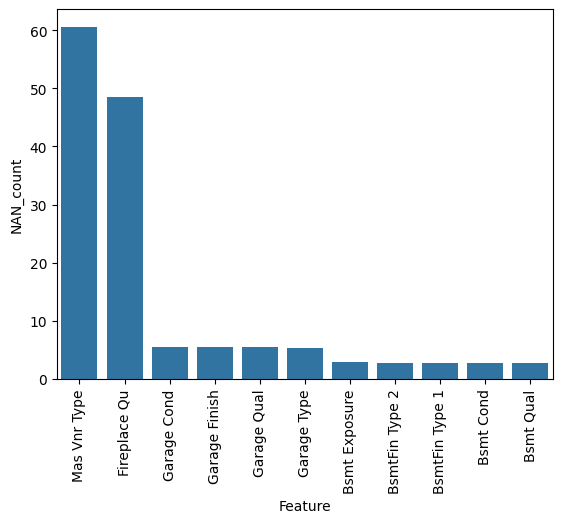

In [175]:
sns.barplot(x = 'Feature',y = 'NAN_count',data = percent_nan)
plt.xticks(rotation = 90)
plt.show()

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      777 non-null    object 
 1   MS Zoning        777 non-null    object 
 2   Lot Frontage     777 non-null    float64
 3   Lot Area         777 non-null    int64  
 4   Street           777 non-null    object 
 5   Lot Shape        777 non-null    object 
 6   Land Contour     777 non-null    object 
 7   Utilities        777 non-null    object 
 8   Lot Config       777 non-null    object 
 9   Land Slope       777 non-null    object 
 10  Neighborhood     777 non-null    object 
 11  Condition 1      777 non-null    object 
 12  Condition 2      777 non-null    object 
 13  Bldg Type        777 non-null    object 
 14  House Style      777 non-null    object 
 15  Overall Qual     777 non-null    int64  
 16  Overall Cond     777 non-null    int64  
 17  Year Built       777

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,777.0,78.562859,19.979196,0.0,70.0,80.0,88.15,174.0
Lot Area,777.0,11686.969112,8158.938623,1680.0,9205.0,11003.0,13200.00,159000.0
Overall Qual,777.0,7.137709,1.306341,4.0,6.0,7.0,8.00,10.0
Overall Cond,777.0,5.316602,0.778344,2.0,5.0,5.0,5.00,9.0
Year Built,777.0,1988.720721,19.770539,1900.0,1974.0,1998.0,2005.00,2010.0
Year Remod/Add,777.0,1992.692407,16.795445,1950.0,1980.0,2000.0,2006.00,2010.0
Mas Vnr Area,777.0,283.190476,215.952326,0.0,143.0,234.0,360.00,1600.0
BsmtFin SF 1,777.0,641.683398,519.693350,0.0,40.0,639.0,1024.00,2288.0
BsmtFin SF 2,777.0,50.615187,185.834964,0.0,0.0,0.0,0.00,1526.0
Bsmt Unf SF,777.0,633.234234,497.677595,0.0,270.0,481.0,901.00,2336.0


#**Numerical Column to Categorical**
For Categories features, we need to make sure numerical representation makes sense or not. For instance MS SubClass where each number represents the class.

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES".

Keep in mind, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2. We need to fully understand the data set to examine what needs to be converted/changed.

MSSubClass: Identifies the type of dwelling involved in the sale.

    * 20	1-STORY 1946 & NEWER ALL STYLES
    * 30	1-STORY 1945 & OLDER
    * 40	1-STORY W/FINISHED ATTIC ALL AGES
    * 45	1-1/2 STORY - UNFINISHED ALL AGES
    ....

In [222]:
#convert numerical value to string, so that it can be converted to dummy variables later

In [223]:
df['MS SubClass'] = df['MS SubClass'].astype('str')

In [224]:
df['MS SubClass']

,MS SubClass
0,20
5,60
15,60
17,20
19,20
...,...
2895,20
2896,20
2897,20
2910,20


In [225]:
df['MS SubClass'].dtype

dtype('O')

As we can see using astype coverts the numberical datatype as strings but not changes their actual values to strings.

In [226]:
#Method 2 (bothe achieve the same results)

df['MS SubClass'] = df['MS SubClass'].apply(str)

In [227]:
df['MS SubClass']

,MS SubClass
0,20
5,60
15,60
17,20
19,20
...,...
2895,20
2896,20
2897,20
2910,20


In [228]:
df['MS SubClass']

,MS SubClass
0,20
5,60
15,60
17,20
19,20
...,...
2895,20
2896,20
2897,20
2910,20


#**Creating Dummy Variables from Object Columns**

In [229]:

def dtype_col(df):
  object_cols = []
  numerical_cols = []
  for col in df.columns:
    if df[col].dtype =='object':
      object_cols.append(col)
    elif df[col].dtype =='int64' or df[col].dtype == 'float64':
      numerical_cols.append(col)
  return object_cols , numerical_cols


In [230]:
object_cols , numerical_cols = dtype_col(df)

In [231]:
class Categorical:
  def __init__(self,df):
    self.df = df
  def obj_col(df):
    object_cols = []
    for col in df.columns:
      if df[col].dtype =='object':
        object_cols.append(col)
    print(f'Length of Object Columns:{len(object_cols)}')
    return object_cols


  def num_col(df):
    numerical_cols = []
    for col in df.columns:
      if df[col].dtype =='int64' or df[col].dtype == 'float64':
        numerical_cols.append(col)
    print(f'Length of Numerical Columns:{len(numerical_cols)}')
    return numerical_cols


In [232]:
Categorical.obj_col(df)

Length of Object Columns:40


['MS SubClass',
 'MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [233]:
Categorical.num_col(df)

Length of Numerical Columns:36


['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [234]:
df.select_dtypes(include = 'object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
5,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
15,60,RL,Pave,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,Ex,Mod,Gd,BuiltIn,Fin,TA,TA,Y,WD,Normal
17,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,...,Ex,Typ,Ex,Attchd,Fin,TA,TA,Y,New,Partial
19,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
2896,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,New,Partial
2897,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
2910,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [235]:
numerical_cols

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [236]:
df.select_dtypes(exclude = 'object')

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
5,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,360,36,0,0,0,0,0,6,2010,195500
15,47.0,53504,8,5,2003,2003,603.0,1416.0,0.0,234.0,...,503,36,0,0,210,0,0,6,2010,538000
17,88.0,11394,9,2,2010,2010,350.0,1445.0,0.0,411.0,...,113,0,0,0,0,0,0,6,2010,394432
19,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,...,349,0,0,0,0,0,0,2,2010,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,95.0,13618,8,5,2005,2006,198.0,1350.0,0.0,378.0,...,172,38,0,0,0,0,0,11,2006,320000
2896,88.0,11443,8,5,2005,2006,208.0,1460.0,0.0,408.0,...,326,66,0,0,0,0,0,3,2006,369900
2897,88.0,11577,9,5,2005,2006,382.0,1455.0,0.0,383.0,...,161,225,0,0,0,0,0,9,2006,359900
2910,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,641.0,...,160,0,0,0,0,0,0,5,2006,140000


In [237]:
df.select_dtypes(exclude = 'object').columns.tolist()


['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

#**Converting**

In [238]:
df_objects_dummies = pd.get_dummies(object_cols,drop_first = True)

In [241]:
final_df = pd.concat([df[numerical_cols],df_objects_dummies],axis = 1)

In [242]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,MS Zoning,Mas Vnr Type,Neighborhood,Paved Drive,Roof Matl,Roof Style,Sale Condition,Sale Type,Street,Utilities
0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,...,False,False,False,False,False,False,False,False,False,False
5,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,False,False,False,False,False,False,False,False,False,True
15,47.0,53504.0,8.0,5.0,2003.0,2003.0,603.0,1416.0,0.0,234.0,...,False,False,False,False,False,False,False,False,False,False
17,88.0,11394.0,9.0,2.0,2010.0,2010.0,350.0,1445.0,0.0,411.0,...,False,True,False,False,False,False,False,False,False,False
19,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


#**Final Thoughts**
Keep in mind, we don't know if 274 columns is very useful. More columns doesn't necessarily lead to better results. In fact, we may want to further remove columns (or later on use a model with regularization to choose important columns for us). What we have done here has greatly expanded the ratio of rows to columns, which may actually lead to worse performance (however you don't know until you've actually compared multiple models/approaches).

In [245]:
final_df.corr()['SalePrice'].sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.804900
Gr Liv Area,0.695516
Exterior 1st,0.670449
Garage Cars,0.653551
...,...
Neighborhood,NaN
Roof Matl,NaN
Roof Style,NaN
Sale Condition,NaN
